# Chargement et Prétraitement du Dataset

### 🧩 Charger les images du dataset et vérifier leurs extensions

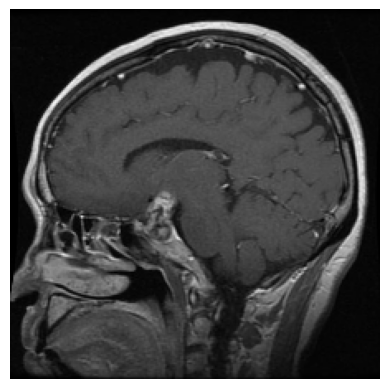

In [9]:
import os
import random
import cv2
import numpy as np
from pathlib import Path

folder = r"B:\Deep Learning\BrainScan\data\images IRM"

extensions = ('.jpg', '.jpeg', '.png','.bmp')
images = []
labels = []

for class_name in os.listdir(folder):
    class_folder = os.path.join(folder,class_name)
    if os.path.isdir(class_folder):
        for file in os.listdir(class_folder):
            if file.lower().endswith(extensions):
                try:
                    file_name = os.path.join(class_folder, file)
                    img = cv2.imread(file_name)
                    if img is None:
                        raise Exception("Image corrompue ou non lisible")
                    img = cv2.resize(img,(224,224))
                    images.append(img)
                    labels.append(class_name)

                except Exception as e:
                    os.remove(file_name)
                    continue

                    

paired = list(zip(images, labels))
random.shuffle(paired)

image_shuffled = []
labels_shuffled = []

for pair in paired:
    image_shuffled.append(pair[0])
    labels_shuffled.append(pair[1])


images_array = np.array(image_shuffled)
labels_array = np.array(labels_shuffled)

import matplotlib.pyplot as plt

if len(images_array) == 0:
    print("Aucune image valide trouvée.")
else:
    plt.imshow(images_array[0])
    plt.axis('off')
    plt.show()

### Histogramme du nombre d’images par catégorie

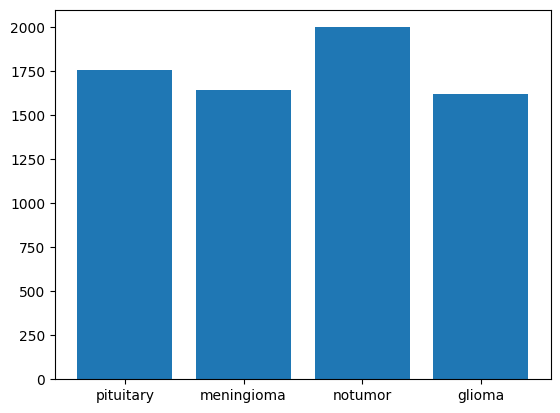

In [10]:
from collections import Counter

class_counts = Counter(labels_array)


classes  = list(class_counts.keys())
counts = list(class_counts.values())

plt.bar(classes,counts)
plt.show()
